Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)Referensi: https://en.wikipedia.org/wiki/Simple_linear_regression

# Sample Dataset

In [5]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18], 
         'harga': [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Daftar diameter pizza dan harga. Dictionary yang terdiri dari 2 buah key yaitu diameter dan harga. Key berasosiasi dengan list. Membuat suatu model machine learning sederhana untuk memprediksi harga pizza bila diketahui ukuran diameternya. Diameter = features. Harga pizza = target.

# Visualisasi Data

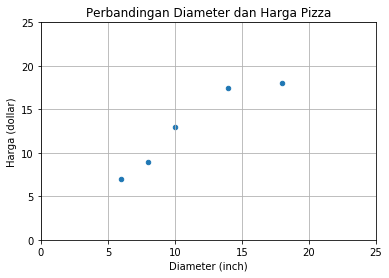

In [7]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Visualisasi Data Pizza menggunakan scatter plot. pizza_df.plot menggunakan 3 parameter kind = scatter, karena plotting yang ingin digunakan adalah scatter plot. x berasosiasi dengan diameter y berasosiasi dengan harga plt.xlim dan plt.ylim digunakan untuk mengatur jangkauan sumbu x dan sumbu y.

# Penyesuaian Dataset

In [8]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


Tujuannya untuk mengelompokan features dan target kedalam 2 variable yang terpisah dan menkonversi struktur data yang semula menggunakan pandas data frame menjadi numpy array.

In [9]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

Diameter adalah features, maka akan dilakukan seleksi lebih dahulu dan akan dikonversi menjadi numpy array.

In [10]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

X tersebut merupakan sekumpulan nilai features dan target. Variable x hanya terdiri dari 1 dimensi sedangkan model machine learning dalam skicit-learn membutuhkan sekumpulan nilai features yang dirampung dalam suatu array 2 dimensi. Maka dilakukanlah proses reshaping terhadap array yang digunakan untuk menampung nilai features.

# Training Simple Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Melakukan proses training model machine learning. Training dilakukan dengan menggunakan methode fit().

# Visualisasi Simple Linear Regression Model

In [13]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

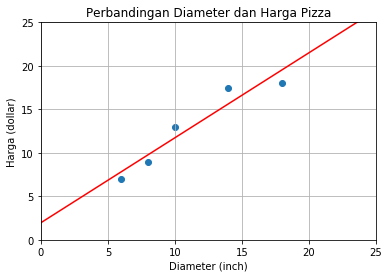

In [14]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Linear regression merupakan model yang sederhana dan akan menghasilkan garis lurus. Oleh karena itu, untuk menampilkan visualisasi persamaan garis maka yang pertama harus dilakukan adalah menyiapkan 2 buah nilai untuk x yaitu nilai 0 dan nilai 25. Kedua nilai dilakukan karena ingin melakukan plotting pada area berukuran 25x25 dan mengambil nilai terkecil dan nilai terbesarnya yaitu 0 dan 25.

In [15]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


Untuk menampilkan nilai intercept bisa dengan memanggil model objek lalu panggil .intercept, Untuk menampilkan nilai slope bisa dengan memanggil model objek lalu panggil .coef

# Mencari Nilai Slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\beta = \frac{cov(x, y)}{var(x)}$

In [16]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


Pembagian antara nilai cov dari x dan y dibagi dengan nilai var dari x. In 10 untuk melihat nilai x dan y.

## Variance

In [17]:
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


Untuk menghitung nilai variance maka panggil np.var lalu dibutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten dan parameter kedua yaitu ddof yaitu dd of freedom (lihat di pelajaran statistika) di set sebagai 1.

## Covariance

In [18]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [19]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


Untuk menghitung nilai covariance maka dipanggil np.cov lalu dibutuhkan 2 parameter. Parameter pertama yaitu nilai x yang sudah di flatten dan parameter kedua nilai dari variable y. Akan menghasilkan covariance matrix dan terdiri dari 2 kolom dan 2 baris. Tetapi nilai covariance yang akan digunakan yaitu yang berada dalam diagonal yaitu 22,65.

Maka nilai yang perlu diambil berada di index ke 0 dan dimensi kedua berada di index ke 1.

## Slope

In [20]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


Setelah nilai variance dan covariance ditemukan,barulah nilai slope dapat digunakan dengan formula seperti diatas.

## Mencari Nilai Intercept

Formula Nilai Intercept

$\alpha = \bar{y} - \beta \bar{x}$

In [22]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: 1.9655172413793096


Nilai intercept diperoleh dengan menselisihkan nilai rata-rata dari y/target terhadap hasil perkalian antara slope dan nilai rata-rata dari x.

## Prediksi Harga Pizza

In [23]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizzadiameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [24]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

Berdasarkan ukuran diameternya berdasarkan 3 nilai diameter. Yaitu 12, 20 dan 23 sebagai features yang akan diprediksi. Lalu 3 nilai tersebut dibundle menjadi np array.

In [25]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} predilsi harga: {hrg}')

Diameter: [12] predilsi harga: 13.681034482758621
Diameter: [20] predilsi harga: 21.491379310344826
Diameter: [23] predilsi harga: 24.42025862068965


Diatas merupakan hasil prediksi dari 3 harga pizza.

# Evaluasi Simple Linear Regression Model

## Training & Testing Dataset

In [26]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

X_train dan y_train langsung digunakan np array.

## Training Simple Linear Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dibentuk kembali objek model untuk ditraining dengan menggunakan linearregression. Ditampung ke dalam variable model.

## Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)